<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رمزگشایی از روایت‌های خاموش: نجات دادن جوانان از چنگال خودکشی
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این چالش، شما به عنوان یک دانشمند داده با قلبی مشتاق برای نجات جان‌ها، ماموریت دارید که داده‌های گزارش‌دهی ملی مرگ‌های خشونت‌آمیز را تجزیه و تحلیل کنید. این داده‌ها شامل خلاصه‌ای از گزارش‌های انتظامی و پزشکی قانونی می‌باشد که مربوط به خودکشی‌های انجام‌شده توسط جوانان است. هدف از این تجزیه و تحلیل، شناسایی عوامل کلیدی است که می‌تواند به پیشگیری از خودکشی در آینده کمک کند.
داده‌های ارائه‌شده شامل روایت‌های مختلف و غیرقابل شناسایی است که توسط کارشناسان دولتی تهیه شده‌اند. این داده‌ها خلاصه‌ای از ماجراهای تلخی هستند که باید با دقت و حساسیت بررسی شوند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [148]:
import pandas as pd
import numpy as np
import string
import torch
import re
import nltk 
import matplotlib.pyplot as plt 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
import matplotlib.cm as cm


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل ۳۰۰۰ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|uid|شناسه‌ی یکتای هر مورد|
|NarrativeLE|گزارش خلاصه‌ای از اطلاعات مامور قانون|
|NarrativeCME|خلاصه‌ای از اطلاعات گزارش پزشک قانونی/معاینه‌کننده پزشکی|
|DepressedMood|در آن زمان افسرده بوده یا خیر (۰ یا ۱)|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آزمایش نیز مانند مجموعه آموزش است با این تفاوت که ستون <code>DepressedMood</code> که متغیر هدف مسئله است را در خود ندارد. مجموعه داده آزمایش ۵۰۰ سطر دارد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [149]:
train_data = pd.read_csv('../data/train.csv')
train_data

,uid,NarrativeLE,NarrativeCME,DepressedMood
0,astm,V was a XX XX found unresponsive and hanging i...,V was a XX XX found unresponsive and hanging i...,0
1,eqeq,The V is an XX XX. The V called his girlfriend...,DC NOTES: EVIDENCE OF RECENT ALCOHOL USE; RECE...,1
2,arpf,V is a XX XX who died by suicide via multiple ...,V is a XX XX who died by suicide via multiple ...,0
3,ffal,Police were dispatched for a sick assist/ poss...,V is a XX XX who was found unresponsive in an ...,0
4,dyqf,Victim XX died of unspecified causes with an u...,Victim XX XX died from Self-Inflicted Intraora...,0
...,...,...,...,...
2995,begx,V was XXXX. V was found lying on the bed at hi...,V was XXXX. V was found lying on the bed at hi...,0
2996,coxo,"V was a XX, XX. [DC notes that the V is XX]Per...","V was a XX, XX. [DC notes that the V is XX]Per...",0
2997,cqrl,V was found hanging by a rope in the garage by...,V was a XX XX XX whose manner of death was sui...,0
2998,fftl,Officers responded to the report of a suicide ...,The Victim (V) was a XX XX XX XX. V was disco...,1


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [150]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uid            3000 non-null   object
 1   NarrativeLE    3000 non-null   object
 2   NarrativeCME   3000 non-null   object
 3   DepressedMood  3000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [151]:
train_data.isnull().sum()    

uid              0
NarrativeLE      0
NarrativeCME     0
DepressedMood    0
dtype: int64

In [152]:
train_data['NarrativeCME'].value_counts()

NarrativeCME
OH 2020 Incident: 3334 was merged with OH 2020 Incident: 3035.PER DC, V1 INTENTIONALLY CONSUMED THE SUBSTANCES. -EB.PER DC, V2 INTENTIONALLY CONSUMED SUBSTANCES LISTED. -EB.V1 was XXXX/brother of V2 and V2 was XXXX/brother of V1. V1 was found in a hotel room in a state of decomposition due to the acute toxic effects of ethanol and pentobarbital poisoning which was suicidal in nature. V2 was found in a hotel room in a state of decomposition due to the acute toxic effects of ethanol and pentobarbital poisoning which was suicidal in nature. Both victims were pronounced deceased at the scene by EMS. V1 had a history of anxiety, chronic sinusitis, dysfunction eustachian tube, unspecified mental disorder, and history of exposure to lead. No significant medical history was included for V2. Per the victims' mother, V1 and V2 had no histories of substance abuse or suicidal ideations. V1 and V2 were both last known alive approximately one week prior, when V1 sent a text message to t

In [153]:
train_data['NarrativeLE'].value_counts()

NarrativeLE
The V was a XX XX. The injury location was documented as residence-apartment/house. The weapon type was not documented. No circumstances were documented. The manner of death was documented as could not be determined.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پاکسازی
</font>
</h2>


In [154]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/ali/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/ali/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/ali/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/ali/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/ali/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged

True

In [155]:
def clean_and_tokenize(text):
    if pd.isna(text):  # Handle missing values
        return []
    

    text = text.lower()
    
    text = text.translate(str.maketrans("", "", string.punctuation))
    

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

In [156]:
train_data['clean_NarrativeCME'] = train_data['NarrativeCME'].apply(clean_and_tokenize) 

In [157]:
train_data['clean_NarrativeLE'] = train_data['NarrativeLE'].apply(clean_and_tokenize) 

In [158]:
train_data['clean_NarrativeLE']

0       [v, xx, xx, found, unresponsive, hanging, resi...
1       [v, xx, xx, v, called, girlfriend, asked, come...
2       [v, xx, xx, died, suicide, via, multiple, inju...
3       [police, dispatched, sick, assist, possible, o...
4       [victim, xx, died, unspecified, cause, unspeci...
                              ...                        
2995    [v, xxxx, v, found, lying, bed, residence, dec...
2996    [v, xx, xx, dc, note, v, xxper, police, v, che...
2997    [v, found, hanging, rope, garage, stepfather, ...
2998    [officer, responded, report, suicide, progress...
2999    [law, enforcement, dispatched, residence, xx, ...
Name: clean_NarrativeLE, Length: 3000, dtype: object

In [159]:
train_data["clean_NarrativeLE"] = train_data["clean_NarrativeLE"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

In [160]:
train_data["clean_NarrativeCME"] = train_data["clean_NarrativeCME"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

In [161]:
all_words = ''.join(train_data['clean_NarrativeLE']).split()

In [162]:
word_freq = Counter(all_words)
word_freq

Counter({'v': 22108,
         'xx': 5592,
         'victim': 4680,
         'found': 4598,
         'suicide': 2674,
         'mother': 2383,
         'stated': 2151,
         'scene': 1984,
         'death': 1777,
         'le': 1753,
         'head': 1737,
         'father': 1682,
         'friend': 1645,
         'day': 1600,
         'em': 1558,
         'residence': 1557,
         'prior': 1540,
         'gunshot': 1499,
         'hanging': 1492,
         'girlfriend': 1486,
         'home': 1486,
         'wound': 1478,
         'called': 1389,
         'pronounced': 1336,
         'police': 1274,
         'note': 1267,
         'deceased': 1211,
         'suicidal': 1137,
         'told': 1128,
         'hour': 1105,
         'arrived': 1102,
         'went': 1099,
         'said': 1038,
         'time': 1025,
         'incident': 1005,
         'family': 994,
         'reported': 990,
         'also': 978,
         'responded': 976,
         'bedroom': 970,
         'history': 

In [163]:
common_words = word_freq.most_common(20)
common_words

[('v', 22108),
 ('xx', 5592),
 ('victim', 4680),
 ('found', 4598),
 ('suicide', 2674),
 ('mother', 2383),
 ('stated', 2151),
 ('scene', 1984),
 ('death', 1777),
 ('le', 1753),
 ('head', 1737),
 ('father', 1682),
 ('friend', 1645),
 ('day', 1600),
 ('em', 1558),
 ('residence', 1557),
 ('prior', 1540),
 ('gunshot', 1499),
 ('hanging', 1492),
 ('girlfriend', 1486)]

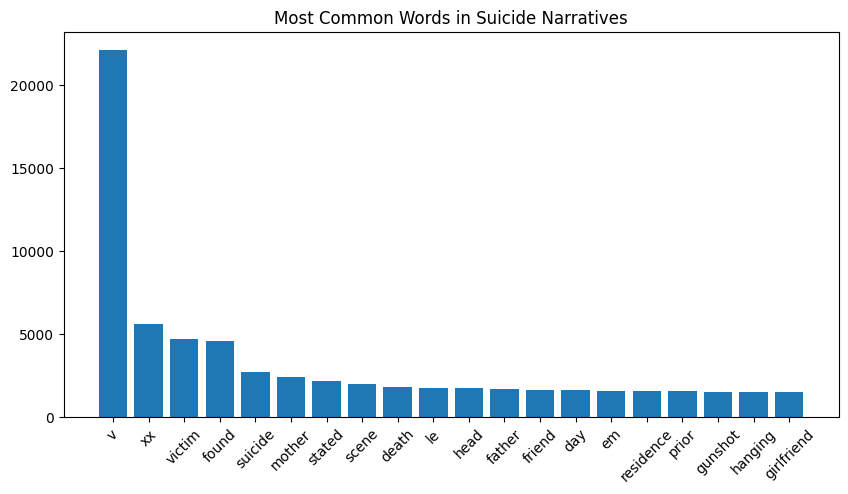

In [164]:
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Most Common Words in Suicide Narratives")
plt.show()

In [165]:
def get_sentiment(
	text: str
)-> str:
    if isinstance(text, list):
        text = ''.join(text)
    return TextBlob(text).sentiment.polarity

train_data['sentiment_NarrativeLE'] = train_data['clean_NarrativeLE'].apply(get_sentiment)
train_data['sentiment_NarrativeCME'] = train_data['clean_NarrativeCME'].apply(get_sentiment)


In [166]:
train_data['sentiment_NarrativeCME'].head()

0    0.023864
1   -0.190341
2   -0.105556
3    0.108333
4   -0.066667
Name: sentiment_NarrativeCME, dtype: float64

In [167]:

train_data['sentiment_NarrativeLE'].head()

0    0.005714
1    0.012338
2   -0.010000
3   -0.094048
4   -0.050000
Name: sentiment_NarrativeLE, dtype: float64

/tmp/ipykernel_7303/2986840130.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_data['sentiment_NarrativeCME'], train_data['sentiment_NarrativeLE'], alpha=0.7, cmap=cm.Paired)


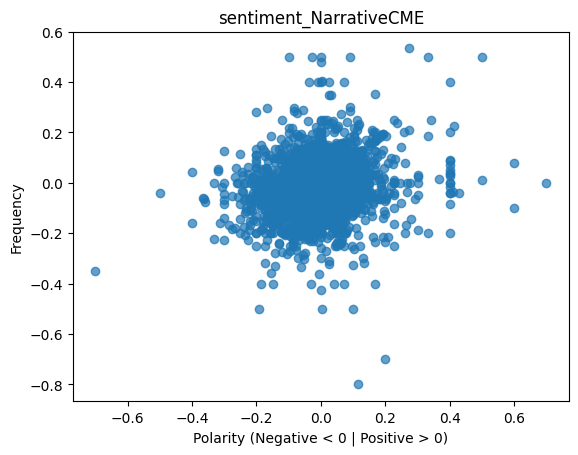

In [168]:
plt.scatter(train_data['sentiment_NarrativeCME'], train_data['sentiment_NarrativeLE'], alpha=0.7, cmap=cm.Paired)
plt.title('sentiment_NarrativeCME')
plt.xlabel("Polarity (Negative < 0 | Positive > 0)")
plt.ylabel("Frequency")
plt.show()

In [169]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')

train_data['combined_text'] = (
    train_data['sentiment_NarrativeLE'].fillna("").astype(str) + " " +
    train_data['sentiment_NarrativeCME'].fillna("").astype(str)
)
x_vectorized = vectorizer.fit_transform(train_data['combined_text']) 


lad = LatentDirichletAllocation(n_components=5, random_state=42)
lad.fit(x_vectorized)


topic_assignment = lad.transform(x_vectorized)
train_data["Topic"] = topic_assignment.argmax(axis=1) + 1




In [170]:
train_data[['sentiment_NarrativeLE', 'sentiment_NarrativeCME', 'Topic']].head()

,sentiment_NarrativeLE,sentiment_NarrativeCME,Topic
0,0.005714,0.023864,2
1,0.012338,-0.190341,4
2,-0.010000,-0.105556,5
3,-0.094048,0.108333,3
4,-0.050000,-0.066667,5


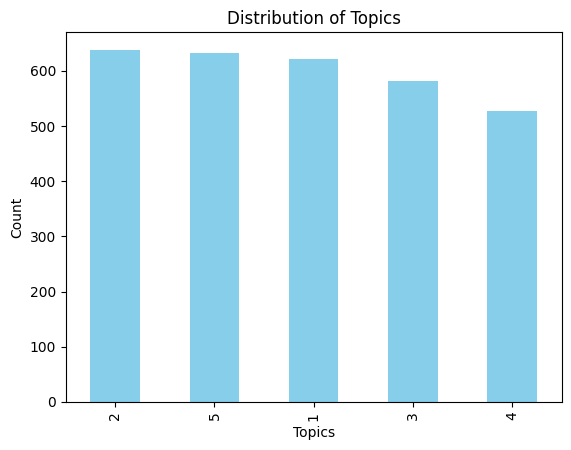

In [171]:
train_data['Topic'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.title('Distribution of Topics')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    <br>
    شما مجاز هستید از هر مدلی که آموخته‌اید استفاده کنید. به عبارت بهتر، هدف این سوال پیش‌بینی هرچه بهتر متغیر هدف مسئله است!
</font>
</p>

In [172]:
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

features = ["sentiment_NarrativeLE", "sentiment_NarrativeCME", "Topic"]

X = train_data[features]

y = train_data['DepressedMood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
X_train.head()

,sentiment_NarrativeLE,sentiment_NarrativeCME,Topic
642,0.400000,0.000000,1
700,-0.029167,-0.043750,4
226,-0.105556,0.082143,4
1697,0.030000,-0.241667,4
1010,0.076190,-0.124545,1


In [174]:
y_train.head()

642     1
700     0
226     0
1697    1
1010    0
Name: DepressedMood, dtype: int64

In [175]:
# modeling 
# from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


ValueError: Negative values in data passed to MultinomialNB (input X).

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>accuracy</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را برای این ستون <i>DepressedMood </i> جداگانه به دست آورده و آن را اعلام کنید
</font>
</p>

In [ ]:
# evaluate model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.615

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|------|---|
|DepressedMood|در آن زمان افسرده بوده یا خیر (۰ یا ۱)|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل یک ستون با اسم <i>DepressedMood</i> است و ۵۰۰ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، مقادیر ستون <i>DepressedMood</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|DepressedMood|
|-----|
|1|
|0|
|0|
|0|
|1|

</font>
</div>



In [ ]:
test_data = pd.read_csv('../data/test.csv')
test_data

,uid,NarrativeLE,NarrativeCME
0,azjz,V (XX XX) was found by his mother hanging by a...,"The V, a XX, XX, was staying at his father's h..."
1,cwke,V was XXXX. V was found at her residence unres...,V was XXXX. V was found in her residence suffe...
2,eqcg,V was XXXX. V was found at her boyfriend's res...,V was XXXX. V was found in another's residence...
3,abgm,A XX XX (V) was found with a GSW to the head i...,V is a XX XX with a medical history of bipolar...
4,cwwt,LE summary:V Demographics data is consistent w...,"XX, XX, Lived w/. - parents/family COD: Gunsh..."
...,...,...,...
495,abbe,V (XX XX) poisoned himself in his garage. V ...,V (XX XX) poisoned himself in his garage. V ...
496,dxof,Victim XX XX died of a self-intentional gunsho...,Victim XX XX died of a self-intentional gunsho...
497,fhqz,V is a XX XX who died by suicide via acute com...,V is a XX XX who died by suicide via acute com...
498,duwv,"The V was a XX, XX XX XX. The V called 911 at ...",The V was a XX XX. The V's family called LE to...


In [ ]:
test_data.fillna('', inplace=True)

In [ ]:
test_data

,uid,NarrativeLE,NarrativeCME
0,azjz,V (XX XX) was found by his mother hanging by a...,"The V, a XX, XX, was staying at his father's h..."
1,cwke,V was XXXX. V was found at her residence unres...,V was XXXX. V was found in her residence suffe...
2,eqcg,V was XXXX. V was found at her boyfriend's res...,V was XXXX. V was found in another's residence...
3,abgm,A XX XX (V) was found with a GSW to the head i...,V is a XX XX with a medical history of bipolar...
4,cwwt,LE summary:V Demographics data is consistent w...,"XX, XX, Lived w/. - parents/family COD: Gunsh..."
...,...,...,...
495,abbe,V (XX XX) poisoned himself in his garage. V ...,V (XX XX) poisoned himself in his garage. V ...
496,dxof,Victim XX XX died of a self-intentional gunsho...,Victim XX XX died of a self-intentional gunsho...
497,fhqz,V is a XX XX who died by suicide via acute com...,V is a XX XX who died by suicide via acute com...
498,duwv,"The V was a XX, XX XX XX. The V called 911 at ...",The V was a XX XX. The V's family called LE to...


In [ ]:
test_data.isnull().sum()

uid             0
NarrativeLE     0
NarrativeCME    0
dtype: int64

In [ ]:
test_data['clean_NarrativeCME'] = test_data['NarrativeCME'].apply(clean_and_tokenize) 

In [ ]:
test_data['clean_NarrativeLE'] = test_data['NarrativeLE'].apply(clean_and_tokenize) 

In [ ]:
test_data["clean_NarrativeLE"] = test_data["clean_NarrativeLE"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

In [ ]:
test_data["clean_NarrativeCME"] = test_data["clean_NarrativeCME"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

In [ ]:
test_data["clean_NarrativeCME"] 
test_data["clean_NarrativeLE"]

0      v xx xx found mother hanging nylon rope tree b...
1      v xxxx v found residence unresponsive result g...
2      v xxxx v found boyfriend residence unresponsiv...
3      xx xx v found gsw head backyard residence v fi...
4      le summaryv demographic data consistent dc dat...
                             ...                        
495    v xx xx poisoned garage v reportedly depressed...
496    victim xx xx died selfintentional gunshot woun...
497    v xx xx died suicide via acute combined toxici...
498    v xx xx xx xx v called 911 1330 hour stated ti...
499    victim xx xx died intentional hanging unspecif...
Name: clean_NarrativeLE, Length: 500, dtype: object

In [ ]:
all_words_test = ''.join(test_data['clean_NarrativeLE']).split()

In [ ]:
word_freq_test = Counter(all_words_test)
word_freq_test

Counter({'v': 3465,
         'xx': 902,
         'victim': 760,
         'found': 730,
         'suicide': 447,
         'mother': 383,
         'stated': 344,
         'scene': 313,
         'le': 312,
         'head': 289,
         'death': 272,
         'friend': 263,
         'em': 262,
         'wound': 252,
         'prior': 245,
         'residence': 242,
         'gunshot': 240,
         'father': 238,
         'police': 231,
         'day': 228,
         'home': 226,
         'pronounced': 215,
         'girlfriend': 215,
         'deceased': 209,
         'called': 205,
         'hanging': 203,
         'note': 200,
         'also': 188,
         'suicidal': 179,
         'arrived': 177,
         'told': 174,
         'time': 171,
         'history': 167,
         'officer': 163,
         'said': 161,
         'went': 161,
         'family': 156,
         'reported': 152,
         'hour': 151,
         'report': 150,
         'responded': 149,
         'depression': 148,
    

In [ ]:
common_words_test = word_freq.most_common(20)
common_words_test

[('v', 22108),
 ('xx', 5592),
 ('victim', 4680),
 ('found', 4598),
 ('suicide', 2674),
 ('mother', 2383),
 ('stated', 2151),
 ('scene', 1984),
 ('death', 1777),
 ('le', 1753),
 ('head', 1737),
 ('father', 1682),
 ('friend', 1645),
 ('day', 1600),
 ('em', 1558),
 ('residence', 1557),
 ('prior', 1540),
 ('gunshot', 1499),
 ('hanging', 1492),
 ('girlfriend', 1486)]

In [ ]:
def get_sentiment(
	text: str
)-> str:
    if isinstance(text, list):
        text = ''.join(text)
    return TextBlob(text).sentiment.polarity

test_data['sentiment_NarrativeLE'] = test_data['clean_NarrativeLE'].apply(get_sentiment)
test_data['sentiment_NarrativeCME'] = test_data['clean_NarrativeCME'].apply(get_sentiment)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [ ]:
import zipfile

if not os.path.exists(os.path.join(os.getcwd(), 'Suicide.ipynb')):
    %notebook -e Suicide.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)
            
submission.to_csv('submission.csv', index=False)
file_names = ['Suicide.ipynb', 'submission.csv']
compress(file_names)

NameError: name 'os' is not defined